# Methods of solving the Cauchy problem

- Runge-Kutta method: 3rd and 4th order
- Euler's implicit and Explicit methods

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from helper import print_funcan, round_to, print_graphs

__data set:__

__Tha Cauchy problem:__
$$y' = -y\tan{x} + \sin{2x}$$

__Analytical solution:__
$$y = -2\cos^2{x} + \cos{x} $$

In [2]:
x0, y0 = 0, -1
h = 0.1
a, b = x0, 1
domain = np.arange(a, b + h, h)

def f(x: float, y: float) -> float:
    return -y * np.tan(x) + np.sin(2 * x)

def sol(x: float) -> float:
    return -2 * (np.cos(x))**2 + np.cos(x)

__Error calculations:__

In [3]:
def errors(y: list[float], domain: list[float], name=None, func=sol, prnt=True) -> tuple[float, float, float]:
    """
    Finds absolute error (C space), relative error and norm in l2
        y:      list[float], range of values

        domain: list[float], range of definition 

        name:   str,         name of function, optional

        func:                function to compare with

        prnt:   bool,        must be printed or not

    """
    abs_error = 0
    rel_error = 0
    for i, x in enumerate(domain):
        abs_error = max(abs_error, abs(func(x) - y[i]))
        rel_error = max(rel_error, abs(func(x) - y[i]) / abs(func(x)))
    l2_norm = sum(x**2 for x in y) ** 0.5

    if prnt:
        print(f'Absolute error of {name}:\t{round_to(abs_error)}')
        print(f'l2 norm of {name}:\t\t{round_to(l2_norm)}')
        print(f'Relative error of {name}:\t{round_to(rel_error * 100)} %\n')
        
    return abs_error, l2_norm, rel_error

# Euler's explicit (geometric) and implicit methods

Actually it is __Runge-Kutta's__ 2nd order method.

In [4]:
def euler_explicit(domain: list[float], y0: float, h=None) -> list[float]:
    """
    Euler's explicit (geometric) method
        domain: numpy.arange[float], scope of definition

        y0:     float, inition value

        h:      float, if None it must be considered as unequal step

    """
    n = len(domain)
    y = [y0] + [0] * (n - 1)

    for i in range(1, n):
        y[i] = y[i - 1] + h * f(domain[i - 1], y[i - 1])
    
    return y

In [5]:
def euler_implicit(domain: list[float], y0: float, h=None, k=4) -> list[float]:
    """
    Euler's implicit (trapezoid) method
        domain: numpy.arange[float], scope of definition

        y0:     float, inition value

        h:      float, if None it must be considered as unequal step

        k:      int, order of averaging 

    """ 
    n = len(domain)
    y = [y0] + [0] * (n - 1)

    for i in range(1, n):
        temp = f(domain[i - 1], y[i - 1])
        y[i] = y[i - 1] + h * temp
        
        for _ in range(1, k + 1):
            y[i] = y[i - 1] + h * (temp + f(domain[i], y[i])) / 2

    return y

Absolute error of Euler's explicit method:	0.06
l2 norm of Euler's explicit method:		2.39
Relative error of Euler's explicit method:	61.06 %

Absolute error of Euler's implicit method:	0.003
l2 norm of Euler's implicit method:		2.28
Relative error of Euler's implicit method:	6.96 %



(0.0030297313318568553, 2.2840620581306115, 0.06956766180696264)

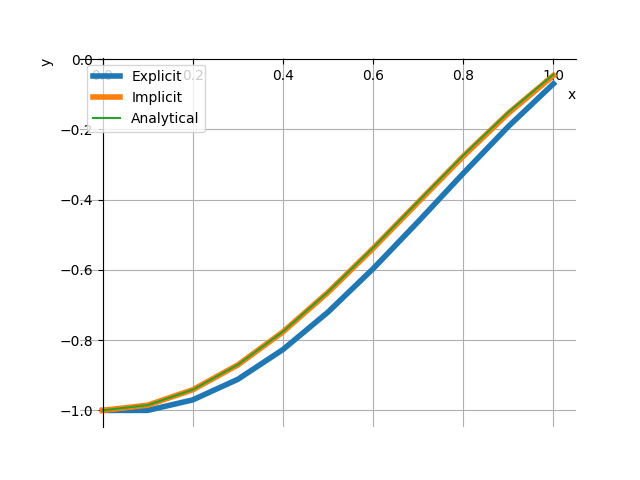

In [6]:
%matplotlib ipympl

y_euler_expl = euler_explicit(domain, y0, h)
y_euler_impl = euler_implicit(domain, y0, h)
print_graphs(domain, y_euler_expl, y_euler_impl, names=["Explicit", "Implicit"], func=sol)
ae1, _, _ = errors(y_euler_expl, domain, name="Euler\'s explicit method", func=sol)
errors(y_euler_impl, domain, name="Euler\'s implicit method", func=sol)

# 3rd and 4th order Runge-Kutta methods

In [7]:
def rkutta3(domain: list[float], y0: float, h=None) -> list[float]:
    """
    Runge-Kutta methods
        domain: numpy.arange[float], scope of definition

        y0:     float, inition value

        h:      float, if None it must be considered as unequal step

    """
    n = len(domain)
    y = [y0] + [0] * (n - 1)

    for i in range(1, n):
        k1 = f(domain[i - 1],             y[i - 1])
        k2 = f(domain[i - 1] + h / 3,     y[i - 1] + h / 3 * k1)
        k3 = f(domain[i - 1] + 2 * h / 3, y[i - 1] + 2 * h / 3 * k2)

        y[i] = y[i - 1] + h / 6 * (k1 + 4 * k2 + k3)

    return y

In [8]:
def rkutta4(domain: list[float], y0: float, h=None) -> list[float]:
    """
    Runge-Kutta methods
        domain: numpy.arange[float], scope of definition

        y0:     float, inition value

        h:      float, if None it must be considered as unequal step

    """
    n = len(domain)
    y = [y0] + [0] * (n - 1)

    for i in range(1, n):
        k1 = f(domain[i - 1],         y[i - 1])
        k2 = f(domain[i - 1] + h / 2, y[i - 1] + h / 2 * k1)
        k3 = f(domain[i - 1] + h / 2, y[i - 1] + h / 2 * k2)
        k4 = f(domain[i - 1] + h,     y[i - 1] + h * k3)

        y[i] = y[i - 1] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

    return y

Absolute error of Runge-kutta method (3rd order):	0.019
l2 norm of Runge-kutta method (3rd order):		2.31
Relative error of Runge-kutta method (3rd order):	16.47 %

Absolute error of Runge-kutta method (4rd order):	4.6e-06
l2 norm of Runge-kutta method (4rd order):		2.28
Relative error of Runge-kutta method (4rd order):	0.011 %



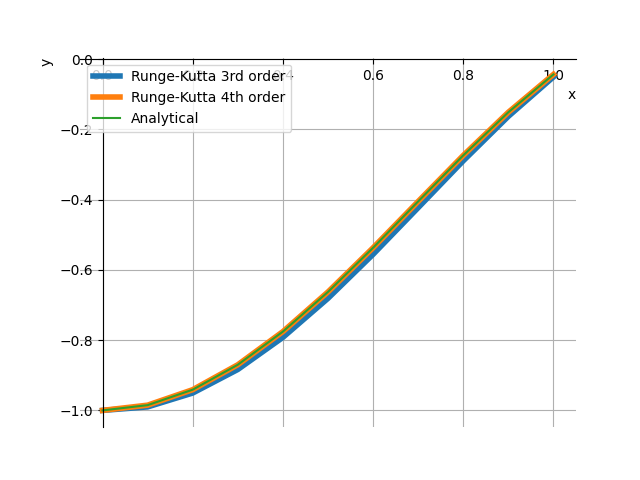

In [9]:
%matplotlib ipympl

y_rk3 = rkutta3(domain, y0, h)
y_rk4 = rkutta4(domain, y0, h)
print_graphs(domain, y_rk3, y_rk4, names=["Runge-Kutta 3rd order", "Runge-Kutta 4th order"], func=sol)
arg31, lrg31, rrg31 = errors(y_rk3, domain, name="Runge-kutta method (3rd order)")
arg41, lrg41, rrg41 = errors(y_rk4, domain, name="Runge-kutta method (4rd order)")

# Euler-Cauchy method

In [10]:
def eulercauchy(domain: list[float], y0: float, h=None) -> list[float]:
    """
    Euler-Cauchy method
        domain: numpy.arange[float], scope of definition

        y0:     float, inition value

        h:      float, if None it must be considered as unequal step

    """

    n = len(domain)
    y = [y0] + [0] * (n - 1)
    
    for i in range(1, n):
        y[i] = y[i - 1] + h * f(domain[i - 1], y[i - 1])

        y[i] = y[i - 1] + h * (f(domain[i - 1], y[i - 1]) + f(domain[i], y[i])) / 2

    return y 

Absolute error of Euler-Cauchy method:	0.0035
l2 norm of Euler-Cauchy method:		2.28
Relative error of Euler-Cauchy method:	8.08 %



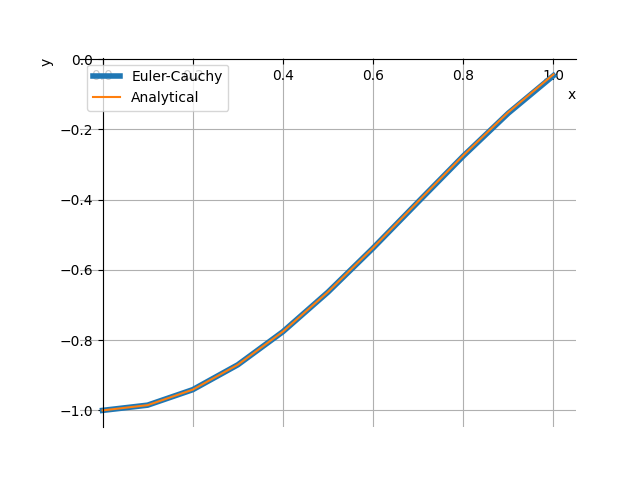

In [11]:
%matplotlib ipympl

y_ec = eulercauchy(domain, y0, h)
print_graphs(domain, y_ec, names=["Euler-Cauchy"], func=sol)
aec1, _, _ = errors(y_ec, domain, name="Euler-Cauchy method")

# Rate of convergens

Doesn't work properly

In [12]:


h2 = 0.05
domain2 = np.arange(a, b + h2, h2)

y_rk3_2 = rkutta3(domain2, y0, h2)
arg32, lrg32, rrg32 = errors(y_rk3_2, domain2, prnt=False)
print("Rate of the convergence 3th ord: ")
print(np.log2(arg31 / arg32))
print()

y_rk4_2 = rkutta4(domain2, y0, h2)
arg42, lrg42, rrg42 = errors(y_rk4_2, domain2, prnt=False)
print("Rate of the convergence 4th ord: ")
#print(arg31, arg32)
print(np.log2(arg41 / arg42))
print()

y_ee_2 = euler_explicit(domain2, y0, h2)
ae2, _, _ = errors(y_ee_2, domain2, prnt=False)
print("Rate of the convergence euler explicit: ")
print(np.log2(ae1 / ae2))
print()

y_ec_2 = eulercauchy(domain2, y0, h2)
aec2, _, _ = errors(y_ec_2, domain2, prnt=False)
print("Rate of the convergence euler explicit: ")
print(np.log2(aec1 / aec2))
print()


h3 = 0.025
domain3 = np.arange(a, b + h3, h3)

y_rk3_3 = rkutta3(domain3, y0, h3)
arg33, lrg33, rrg33 = errors(y_rk3_3, domain3, prnt=False)
print("Rate of the convergence 3th ord: ")
print(np.log2(arg32 / arg33))
print()

y_rk4_3 = rkutta4(domain3, y0, h3)
arg43, lrg43, rrg43 = errors(y_rk4_3, domain3, prnt=False)
print("Rate of the convergence 4th ord: ")
#print(arg43)
print(np.log2(arg42 / arg43))
print()

y_ee_3 = euler_explicit(domain3, y0, h3)
ae3, _, _ = errors(y_ee_3, domain3, prnt=False)
print("Rate of the convergence euler explicit: ")
print(np.log2(ae2 / ae3))
print()

y_ec_3 = eulercauchy(domain3, y0, h3)
aec3, _, _ = errors(y_ec_3, domain3, prnt=False)
print("Rate of the convergence euler explicit: ")
print(np.log2(aec2 / aec3))
print()

Rate of the convergence 3th ord: 
1.0034414003421297

Rate of the convergence 4th ord: 
4.024566678760577

Rate of the convergence euler explicit: 
1.044052136359941

Rate of the convergence euler explicit: 
2.0013622011419874

Rate of the convergence 3th ord: 
1.0000233375242433

Rate of the convergence 4th ord: 
4.018928912522358

Rate of the convergence euler explicit: 
1.0223114523718382

Rate of the convergence euler explicit: 
2.0032167641531835

